In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score,classification_report

In [16]:
X, y = make_moons(n_samples=200, noise=0.01,random_state=13)

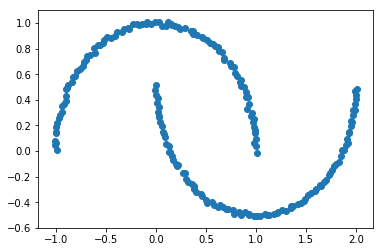

In [17]:
plt.scatter(X[:, 0], X[:, 1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


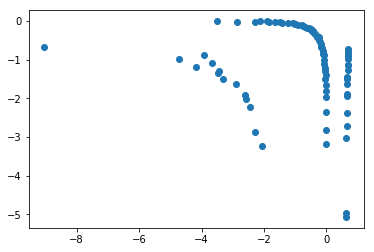

In [18]:
X_log = np.log(X)
plt.scatter(X_log[:, 0], X_log[:, 1])

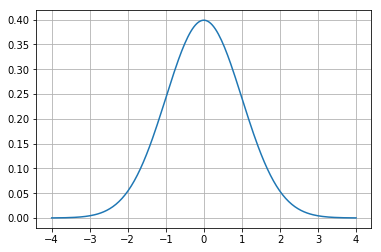

In [61]:
from scipy import stats
x = np.linspace(-4, 4, 200)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y)
plt.grid()

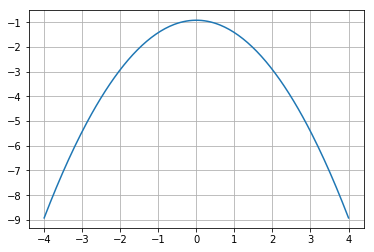

In [62]:
y_log = np.log(y)
plt.plot(x, y_log)
plt.grid()

In [64]:
credit_data = pd.read_csv("german_credit.csv")
credit_data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [ ]:
credit_data['class'] = credit_data['class']-1

def IV_calc(data,var):
    if data[var].dtypes == "object":
        dataf = data.groupby([var])['class'].agg(['count','sum'])
        dataf.columns = ["Total","bad"]    
        dataf["good"] = dataf["Total"] - dataf["bad"]
        dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum()
        dataf["good_per"] = dataf["good"]/dataf["good"].sum()
        dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"]/dataf["bad_per"])
        return dataf
    else:
        data['bin_var'] = pd.qcut(data[var].rank(method='first'),10)
        dataf = data.groupby(['bin_var'])['class'].agg(['count','sum'])
        dataf.columns = ["Total","bad"]    
        dataf["good"] = dataf["Total"] - dataf["bad"]
        dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum()
        dataf["good_per"] = dataf["good"]/dataf["good"].sum()
        dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"]/dataf["bad_per"])
        return dataf


IV_calc(credit_data,'Status_of_existing_checking_account')

print ("\n\nCredit History - Information Value\n")
print (IV_calc(credit_data,'Credit_history'))

print ("\n\nCredit History - Duration in month\n")
print (IV_calc(credit_data,'Duration_in_month'))


print ("\n\nInformation Value by descending order\n")
discrete_columns = ['Status_of_existing_checking_account','Credit_history','Purpose','Savings_Account',
                    'Present_Employment_since','Personal_status_and_sex','Other_debtors','Property',
                    'Other_installment_plans','Housing','Job','Telephone','Foreign_worker']

continuous_columns = ['Duration_in_month', 'Credit_amount','Installment_rate_in_percentage_of_disposable_income',
                      'Present_residence_since', 'Age_in_years','Number_of_existing_credits_at_this_bank',
                       'Number_of_People_being_liable_to_provide_maintenance_for']

total_columns = discrete_columns + continuous_columns


Iv_list = []
for col in total_columns:
    assigned_data =  IV_calc(data = credit_data,var = col)
    iv_val = round(assigned_data["I_V"].sum(),3)
    dt_type = credit_data[col].dtypes
    Iv_list.append((iv_val,col,dt_type))

Iv_list = sorted(Iv_list,reverse = True)

for i in range(len(Iv_list)):
    print (Iv_list[i][0],",",Iv_list[i][1],",type =",Iv_list[i][2])

In [ ]:
dummy_stseca = pd.get_dummies(credit_data['Status_of_existing_checking_account'], prefix='status_exs_accnt')
dummy_ch = pd.get_dummies(credit_data['Credit_history'], prefix='cred_hist')
dummy_purpose = pd.get_dummies(credit_data['Purpose'], prefix='purpose')
dummy_savacc = pd.get_dummies(credit_data['Savings_Account'], prefix='sav_acc')
dummy_presc = pd.get_dummies(credit_data['Present_Employment_since'], prefix='pre_emp_snc')
dummy_perssx = pd.get_dummies(credit_data['Personal_status_and_sex'], prefix='per_stat_sx')
dummy_othdts = pd.get_dummies(credit_data['Other_debtors'], prefix='oth_debtors')


dummy_property = pd.get_dummies(credit_data['Property'], prefix='property')
dummy_othinstpln = pd.get_dummies(credit_data['Other_installment_plans'], prefix='oth_inst_pln')
dummy_forgnwrkr = pd.get_dummies(credit_data['Foreign_worker'], prefix='forgn_wrkr')

#dummy_housing = pd.get_dummies(credit_data['Housing'], prefix='housing')
#dummy_job = pd.get_dummies(credit_data['Job'], prefix='job')
#dummy_telephn = pd.get_dummies(credit_data['Telephone'], prefix='telephn')


continuous_columns = ['Duration_in_month', 'Credit_amount','Installment_rate_in_percentage_of_disposable_income',
                       'Age_in_years','Number_of_existing_credits_at_this_bank' ]


credit_continuous = credit_data[continuous_columns]
credit_data_new = pd.concat([dummy_stseca,dummy_ch,dummy_purpose,dummy_savacc,dummy_presc,dummy_perssx,
                             dummy_property,dummy_othinstpln,dummy_othdts,
                             dummy_forgnwrkr,credit_continuous,credit_data['class']],axis=1)

x_train,x_test,y_train,y_test = train_test_split(credit_data_new.drop(['class'],axis=1),credit_data_new['class'],train_size = 0.7,random_state=42)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


# Logistic Regression
remove_cols_extra_dummy = ['status_exs_accnt_A11','cred_hist_A30','purpose_A40','sav_acc_A61','pre_emp_snc_A71',
               'per_stat_sx_A91','oth_debtors_A101','property_A121','oth_inst_pln_A141','forgn_wrkr_A201']

#'housing_A151','job_A171','telephn_A191',




remove_cols_insig = ['purpose_A46','purpose_A45','purpose_A44','sav_acc_A63','oth_inst_pln_A143',
                     'property_A123','status_exs_accnt_A12','pre_emp_snc_A72','pre_emp_snc_A75',
                     'pre_emp_snc_A73','cred_hist_A32','cred_hist_A33','purpose_A410','pre_emp_snc_A74',
                     'purpose_A49','purpose_A48','property_A122','per_stat_sx_A92','forgn_wrkr_A202',
                     'per_stat_sx_A94','purpose_A42','oth_debtors_A102','Age_in_years','sav_acc_A64',
                     'sav_acc_A62','sav_acc_A65','oth_debtors_A103']

remove_cols = list(set(remove_cols_extra_dummy+remove_cols_insig))


import statsmodels.api as sm
logistic_model = sm.Logit(y_train,sm.add_constant(x_train.drop(remove_cols,axis=1))).fit()
print (logistic_model.summary())
print ("\nVariance Inflation Factor")

In [ ]:
cnames = x_train.drop(remove_cols,axis=1).columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train.drop(remove_cols,axis=1)[yvar],sm.add_constant(x_train.drop(remove_cols,axis=1)[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


y_pred = pd.DataFrame(logistic_model.predict(sm.add_constant(x_train.drop(remove_cols,axis=1))))
y_pred.columns = ["probs"]
#both = pd.concat([y_train.reset_index(drop=True),y_pred],axis=1)

both = pd.concat([y_train,y_pred],axis=1)

zeros = both[['class','probs']][both['class']==0]
ones = both[['class','probs']][both['class']==1]

def df_crossjoin(df1, df2, **kwargs):
    df1['_tmpkey'] = 1
    df2['_tmpkey'] = 1
    res = pd.merge(df1, df2, on='_tmpkey', **kwargs).drop('_tmpkey', axis=1)
    res.index = pd.MultiIndex.from_product((df1.index, df2.index))
    df1.drop('_tmpkey', axis=1, inplace=True)
    df2.drop('_tmpkey', axis=1, inplace=True)
    return res

joined_data = df_crossjoin(ones,zeros)

joined_data['concordant_pair'] = 0
joined_data.loc[joined_data['probs_x'] > joined_data['probs_y'],'concordant_pair'] =1
joined_data['discordant_pair'] = 0
joined_data.loc[joined_data['probs_x'] < joined_data['probs_y'],'discordant_pair'] =1
joined_data['tied_pair'] = 0           
joined_data.loc[joined_data['probs_x'] == joined_data['probs_y'],'tied_pair'] =1 
p_conc = (sum(joined_data['concordant_pair'])*1.0 )/ (joined_data.shape[0])     
p_disc =  (sum(joined_data['discordant_pair'])*1.0 )/ (joined_data.shape[0])
   

c_statistic = 0.5 + (p_conc - p_disc)/2.0           
print ("\nC-statistic:",round(c_statistic,4))                    

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(both['class'],both['probs'], pos_label=1)

roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - German Credit Data')
plt.legend(loc="lower right")
plt.show()

# Tuning for threshold
for i in list(np.arange(0,1,0.1)):
    both["y_pred"] = 0
    both.loc[both["probs"] > i, 'y_pred'] = 1      
    print ("Threshold",i,"Train Accuracy:",round(accuracy_score(both['class'],both['y_pred']),4))

# Implement best threshold on train data
both["y_pred"] = 0
both.loc[both["probs"] > 0.5, 'y_pred'] = 1      
print ("\nTrain Confusion Matrix\n\n",pd.crosstab(both['class'],both['y_pred'],rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nTrain Accuracy:",round(accuracy_score(both['class'],both['y_pred']),4))

# Predicting test output
y_pred_test = pd.DataFrame(logistic_model.predict(sm.add_constant(x_test.drop(remove_cols,axis=1))))
y_pred_test.columns = ["probs"]

#both_test = pd.concat([y_test.reset_index(drop=True),y_pred_test],axis=1)
both_test = pd.concat([y_test,y_pred_test],axis=1)
both_test["y_pred"] = 0
both_test.loc[both_test["probs"] > 0.5, 'y_pred'] = 1      
print ("\nTest Confusion Matrix\n\n",pd.crosstab(both_test['class'],both_test['y_pred'],rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nTest Accuracy:",round(accuracy_score(both_test['class'],both_test['y_pred']),4))

In [ ]:
# Random Forest - Scikit Learn
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

credit_data = pd.read_csv("credit_data.csv")
credit_data['class'] = credit_data['class']-1
                    
dummy_stseca = pd.get_dummies(credit_data['Status_of_existing_checking_account'], prefix='status_exs_accnt')
dummy_ch = pd.get_dummies(credit_data['Credit_history'], prefix='cred_hist')
dummy_purpose = pd.get_dummies(credit_data['Purpose'], prefix='purpose')
dummy_savacc = pd.get_dummies(credit_data['Savings_Account'], prefix='sav_acc')
dummy_presc = pd.get_dummies(credit_data['Present_Employment_since'], prefix='pre_emp_snc')
dummy_perssx = pd.get_dummies(credit_data['Personal_status_and_sex'], prefix='per_stat_sx')
dummy_othdts = pd.get_dummies(credit_data['Other_debtors'], prefix='oth_debtors')
dummy_property = pd.get_dummies(credit_data['Property'], prefix='property')
dummy_othinstpln = pd.get_dummies(credit_data['Other_installment_plans'], prefix='oth_inst_pln')
dummy_housing = pd.get_dummies(credit_data['Housing'], prefix='housing')
dummy_job = pd.get_dummies(credit_data['Job'], prefix='job')
dummy_telephn = pd.get_dummies(credit_data['Telephone'], prefix='telephn')
dummy_forgnwrkr = pd.get_dummies(credit_data['Foreign_worker'], prefix='forgn_wrkr')

continuous_columns = ['Duration_in_month', 'Credit_amount','Installment_rate_in_percentage_of_disposable_income',
                      'Present_residence_since', 'Age_in_years','Number_of_existing_credits_at_this_bank',
                       'Number_of_People_being_liable_to_provide_maintenance_for']

credit_continuous = credit_data[continuous_columns]
credit_data_new = pd.concat([dummy_stseca,dummy_ch,dummy_purpose,dummy_savacc,dummy_presc,dummy_perssx,
                             dummy_othdts,dummy_property,dummy_othinstpln,dummy_housing,dummy_job,
                             dummy_telephn,dummy_forgnwrkr,credit_continuous,credit_data['class']],axis=1)

x_train,x_test,y_train,y_test = train_test_split(credit_data_new.drop(['class'],axis=1),credit_data_new['class'],train_size = 0.7,random_state=42)
           

rf_fit = RandomForestClassifier(n_estimators=1000,criterion="gini",max_depth=100,min_samples_split=3,min_samples_leaf=2)
rf_fit.fit(x_train,y_train)           

print ("\nRandom Forest - Train Confusion Matrix\n\n",pd.crosstab(y_train,rf_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Train accuracy",round(accuracy_score(y_train,rf_fit.predict(x_train)),3))

print ("\n\nRandom Forest - Test Confusion Matrix\n\n",pd.crosstab(y_test,rf_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Test accuracy",round(accuracy_score(y_test,rf_fit.predict(x_test)),3))

In [ ]:
# Grid Search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

pipeline = Pipeline([
        ('clf',RandomForestClassifier(criterion='gini'))  ])

parameters = {
        'clf__n_estimators':(1000,2000,3000),
        'clf__max_depth':(100,200,300),
        'clf__min_samples_split':(2,3),
        'clf__min_samples_leaf':(1,2)  }

grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1,cv=5,verbose=1,scoring='accuracy')
grid_search.fit(x_train,y_train)


print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(x_test)

print ("Testing accuracy:",round(accuracy_score(y_test, predictions),4))
print ("\nComplete report of Testing data\n",classification_report(y_test, predictions))

print ("\n\nRandom Forest Grid Search- Test Confusion Matrix\n\n",pd.crosstab(y_test, predictions,rownames = ["Actuall"],colnames = ["Predicted"]))      

In [ ]:
# Variable Importance chart
import matplotlib.pyplot as plt
rf_fit = RandomForestClassifier(n_estimators=1000,criterion="gini",max_depth=300,min_samples_split=3,min_samples_leaf=1)
rf_fit.fit(x_train,y_train)   

importances = rf_fit.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_fit.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

colnames = list(x_train.columns)
# Print the feature ranking
print("\nFeature ranking:\n")
for f in range(x_train.shape[1]):
    print ("Feature",indices[f],",",colnames[indices[f]],round(importances[indices[f]],4))

plt.figure()
#plt.title("Variable importance")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()


indexi = list(indices)
colnms = list(x_train.columns[indices])
impclnms = list(importances[indices])


print ("\nVariable Importance Values\n")
for i in  range(len(importances)):
    print ("Variable Index",indexi[i],",",colnms[i],",",round(impclnms[i],4))